# Chapter 1: Analysis of Economics Data

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

This notebook provides an interactive introduction to regression analysis using Python. You can run all code directly in Google Colab without any local setup required. The data streams directly from GitHub, making this notebook fully self-contained.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YOUR_USERNAME/YOUR_REPO/blob/main/notebooks_colab/ch01_Analysis_of_Economics_Data.ipynb)

## Chapter Overview

This chapter introduces the fundamental concepts of econometrics and regression analysis. We'll explore how economists use statistical methods to understand relationships in economic data, focusing on a practical example of house prices and house sizes.

**What you'll learn:**
- The difference between descriptive statistics and statistical inference
- Types of economic data (cross-sectional, time series, panel)
- What regression analysis is and why it's central to econometrics
- How to fit a simple linear regression model using Python
- How to interpret regression coefficients economically

**Dataset used:**
- **AED_HOUSE.DTA**: House sale prices for 29 houses in Central Davis, California (1999)
  - Variables: price (sale price in dollars), size (house size in square feet), plus 7 other characteristics

**Chapter outline:**
1. Statistical Methods (descriptive vs. inference)
2. Types of Data (continuous, discrete, categorical)
3. **Regression Analysis** (our focus)
4. Overview of the book

## Slides

In [2]:
# @title Key visual ideas
from IPython.display import HTML, display

display(HTML("""
<div style="position: relative; width: 100%; height: 0; padding-top: 55.8342%;
 padding-bottom: 0; box-shadow: 0 2px 8px 0 rgba(63,69,81,0.16);
 margin-top: 1.6em; margin-bottom: 0.9em; overflow: hidden;
 border-radius: 8px; will-change: transform;">
  <iframe loading="lazy"
    style="position: absolute; width: 100%; height: 100%;
    top: 0; left: 0; border: none; padding: 0; margin: 0;"
    src="https://www.canva.com/design/DAG_BKhFJ_Y/PVyYUpgMWIim-HUQQDLKIA/view?embed"
    allowfullscreen>
  </iframe>
</div>
<a href="https://www.canva.com/design/DAG_BKhFJ_Y/PVyYUpgMWIim-HUQQDLKIA/view"
   target="_blank" rel="noopener">
   01 Analysis of Economics Data
</a>
"""))

## Podcast Overview

<audio controls>
  <source src="https://files.catbox.moe/gx5v4y.m4a" type="audio/mp4">
  Your browser does not support the audio element.
</audio>


## 🔧 Setup

Run this cell first to import all required packages and configure the environment. This sets up:
- Data manipulation (pandas, numpy)
- Statistical modeling (statsmodels)
- Visualization (matplotlib)
- Reproducibility (random seeds)

In [9]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 1.3 What is Regression Analysis?

**Regression analysis** is the primary tool economists use to understand relationships between variables. At its core, regression answers questions like: "How does Y change when X changes?"

In our example:
- **Y (dependent variable)**: House sale price (in dollars)
- **X (independent variable)**: House size (in square feet)

**The regression line** is the "line of best fit" that minimizes the sum of squared distances between actual prices and predicted prices. The mathematical form is:

$$\text{price} = \beta_0 + \beta_1 \times \text{size} + \varepsilon$$

Where:
- $\beta_0$ = **intercept** (predicted price when size = 0)
- $\beta_1$ = **slope** (change in price for each additional square foot)
- $\varepsilon$ = **error term** (random variation not explained by size)

**Economic Interpretation:**  
The slope coefficient $\beta_1$ tells us: "On average, how much more expensive is a house that's 1 square foot larger?" This is a measure of **association**, not necessarily causation.

## 📊 Load the Data

Let's load the house price dataset directly from GitHub. This dataset contains information on 29 house sales in Central Davis, California in 1999.

In [10]:
# Load the Stata dataset from GitHub
data_house = pd.read_stata(GITHUB_DATA_URL + 'AED_HOUSE.DTA')

print(f"✓ Data loaded successfully!")
print(f"  Shape: {data_house.shape[0]} observations, {data_house.shape[1]} variables")

✓ Data loaded successfully!
  Shape: 29 observations, 8 variables


## 🔍 Preview the Data

Let's look at the first few rows to understand what variables we have available.

In [11]:
# Display first 5 rows
print("First 5 observations:")
print(data_house.head())

print("\nColumn names:")
print(data_house.columns.tolist())

First 5 observations:
    price  size  bedrooms  bathrooms  lotsize   age  monthsold    list
0  204000  1400         3        2.0        1  31.0          7  199900
1  212000  1600         3        3.0        2  33.0          5  212000
2  213000  1800         3        2.0        2  51.0          4  219900
3  220000  1600         3        2.0        1  49.0          4  229000
4  224500  2100         4        2.5        2  47.0          6  224500

Column names:
['price', 'size', 'bedrooms', 'bathrooms', 'lotsize', 'age', 'monthsold', 'list']


## 📈 Explore the Data

Before running any regression, it's essential to understand the data through **descriptive statistics**. Let's look at the key statistics for our variables of interest: price and size.

In [12]:
# Summary statistics for all variables
print("=" * 70)
print("DESCRIPTIVE STATISTICS")
print("=" * 70)
print(data_house.describe())

# Focus on our key variables
print("\n" + "=" * 70)
print("KEY VARIABLES: PRICE AND SIZE")
print("=" * 70)
print(data_house[['price', 'size']].describe())

DESCRIPTIVE STATISTICS
               price         size   bedrooms  bathrooms    lotsize        age  \
count      29.000000    29.000000  29.000000  29.000000  29.000000  29.000000   
mean   253910.344828  1882.758621   3.793103   2.206897   2.137931  36.413792   
std     37390.710695   398.272130   0.675030   0.341144   0.693034   7.118975   
min    204000.000000  1400.000000   3.000000   2.000000   1.000000  23.000000   
25%    233000.000000  1600.000000   3.000000   2.000000   2.000000  31.000000   
50%    244000.000000  1800.000000   4.000000   2.000000   2.000000  35.000000   
75%    270000.000000  2000.000000   4.000000   2.500000   3.000000  39.000000   
max    375000.000000  3300.000000   6.000000   3.000000   3.000000  51.000000   

       monthsold           list  
count  29.000000      29.000000  
mean    5.965517  257824.137931  
std     1.679344   40860.264099  
min     3.000000  199900.000000  
25%     5.000000  239000.000000  
50%     6.000000  245000.000000  
75%     7

**Key observations:**
- **Mean house price**: Around $253,910
- **Mean house size**: Around 1,883 square feet
- **Price range**: $204,000 to $375,000
- **Size range**: 1,400 to 3,300 square feet

Notice the variation in both variables - this variation is what allows us to estimate a relationship!

## 📉 Visualizing the Relationship

**Before running any regression**, it's good practice to visualize the relationship between X and Y. A scatter plot helps us:
1. Check if there appears to be a linear relationship
2. Identify any outliers or unusual observations
3. Get an intuitive sense of the strength of the relationship

Let's create a scatter plot of house price vs. house size.

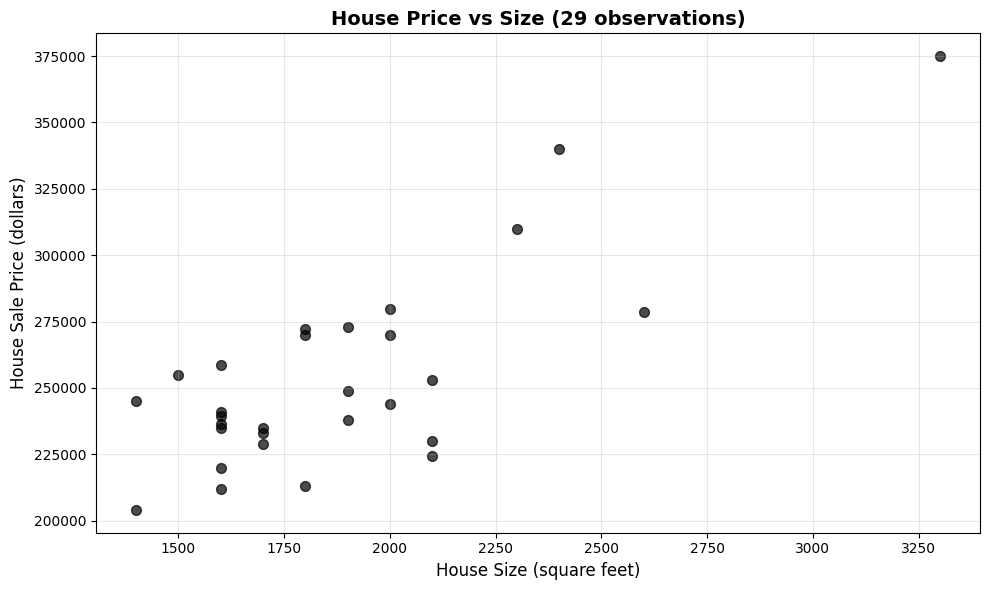


What do you see?
- Positive relationship: Larger houses tend to have higher prices
- Roughly linear: The points follow an upward-sloping pattern
- Some scatter: Not all points lie exactly on a line (this is the 'error')


In [13]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points
ax.scatter(data_house['size'], data_house['price'],
           color='black', s=50, alpha=0.7)

# Labels and formatting
ax.set_xlabel('House Size (square feet)', fontsize=12)
ax.set_ylabel('House Sale Price (dollars)', fontsize=12)
ax.set_title('House Price vs Size (29 observations)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWhat do you see?")
print("- Positive relationship: Larger houses tend to have higher prices")
print("- Roughly linear: The points follow an upward-sloping pattern")
print("- Some scatter: Not all points lie exactly on a line (this is the 'error')")

## 🧮 Fitting a Regression Line

Now we'll fit an **Ordinary Least Squares (OLS)** regression line to these data. OLS chooses the intercept ($\beta_0$) and slope ($\beta_1$) that **minimize the sum of squared residuals**:

$$\min_{\beta_0, \beta_1} \sum_{i=1}^{n} (\text{price}_i - \beta_0 - \beta_1 \times \text{size}_i)^2$$

In other words, we're finding the line that makes our prediction errors as small as possible (in a squared sense).

We'll use Python's `statsmodels` package, which provides regression output similar to Stata and R.

In [14]:
# Fit OLS regression: price ~ size
# The formula syntax is: 'dependent_variable ~ independent_variable'
model = ols('price ~ size', data=data_house).fit()

# Display the full regression output
print("=" * 70)
print("OLS REGRESSION RESULTS: price ~ size")
print("=" * 70)
print(model.summary())

OLS REGRESSION RESULTS: price ~ size
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     43.58
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           4.41e-07
Time:                        20:33:28   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.

## 📖 Interpreting the Results

The regression output contains a lot of information! Let's break down the most important parts:

### Key Statistics to Focus On:

1. **Coefficients table** (middle section):
   - **Intercept**: The predicted price when size = 0 (often not economically meaningful)
   - **size**: The slope coefficient - our main interest!
   - **std err**: Standard error (measures precision of the estimate)
   - **t**: t-statistic (coefficient / standard error)
   - **P>|t|**: p-value (tests if coefficient is significantly different from zero)

2. **R-squared** (top right section):
   - Proportion of variation in Y explained by X
   - Ranges from 0 to 1 (higher = better fit)

3. **F-statistic** (top right section):
   - Tests overall significance of the regression
   - Low p-value (Prob F-statistic) means the model is significant

Let's extract and interpret the key coefficients.

In [15]:
# Extract key statistics
intercept = model.params['Intercept']
slope = model.params['size']
r_squared = model.rsquared
n_obs = int(model.nobs)

print("=" * 70)
print("KEY REGRESSION COEFFICIENTS")
print("=" * 70)
print(f"Intercept (β₀):        ${intercept:,.2f}")
print(f"Slope (β₁):           ${slope:,.2f}")
print(f"R-squared:            {r_squared:.4f} ({r_squared*100:.2f}%)")
print(f"Number of observations: {n_obs}")

print("\n" + "=" * 70)
print("ECONOMIC INTERPRETATION")
print("=" * 70)
print(f"📌 For every additional square foot of house size,")
print(f"   the sale price increases by approximately ${slope:,.2f}")
print(f"\n📌 The model explains {r_squared*100:.2f}% of the variation in house prices")
print(f"\n📌 The remaining {(1-r_squared)*100:.2f}% is due to other factors not included")
print(f"   (e.g., location, age, condition, neighborhood quality)")

KEY REGRESSION COEFFICIENTS
Intercept (β₀):        $115,017.28
Slope (β₁):           $73.77
R-squared:            0.6175 (61.75%)
Number of observations: 29

ECONOMIC INTERPRETATION
📌 For every additional square foot of house size,
   the sale price increases by approximately $73.77

📌 The model explains 61.75% of the variation in house prices

📌 The remaining 38.25% is due to other factors not included
   (e.g., location, age, condition, neighborhood quality)


## 📊 Visualizing the Fitted Line

The **fitted regression line** represents our model's predictions. For any given house size, the line shows the predicted price according to our equation:

$$\hat{\text{price}} = \beta_0 + \beta_1 \times \text{size}$$

Let's overlay this fitted line on our scatter plot to see how well it captures the relationship.

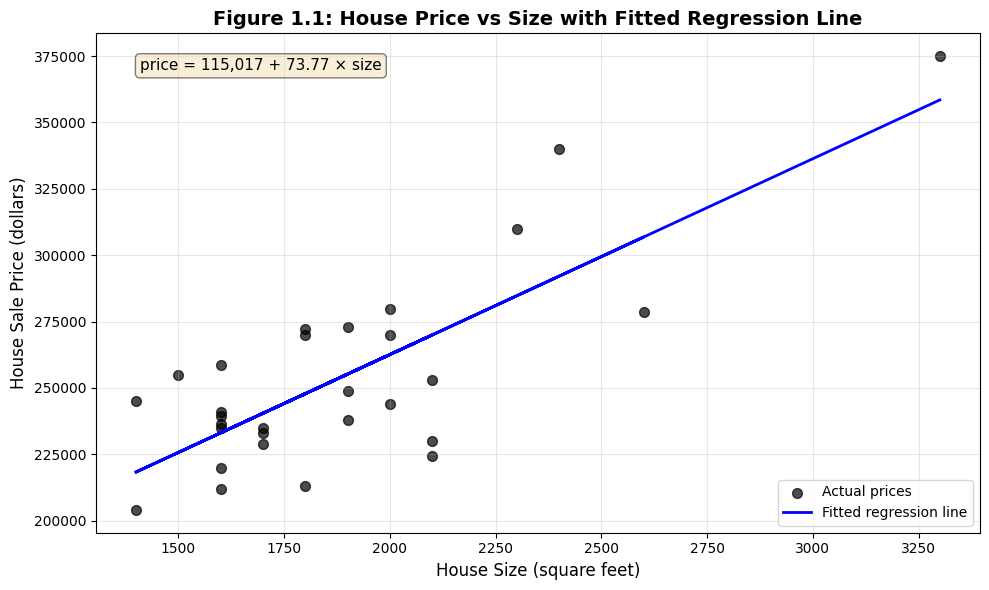


📊 The blue line is our 'line of best fit'
   It minimizes the sum of squared vertical distances from each point


In [16]:
# Create scatter plot with fitted regression line
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual data points
ax.scatter(data_house['size'], data_house['price'],
           color='black', s=50, label='Actual prices', alpha=0.7)

# Plot fitted regression line
ax.plot(data_house['size'], model.fittedvalues,
        color='blue', linewidth=2, label='Fitted regression line')

# Add equation to plot
equation_text = f'price = {intercept:,.0f} + {slope:.2f} × size'
ax.text(0.05, 0.95, equation_text,
        transform=ax.transAxes, fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Labels and formatting
ax.set_xlabel('House Size (square feet)', fontsize=12)
ax.set_ylabel('House Sale Price (dollars)', fontsize=12)
ax.set_title('Figure 1.1: House Price vs Size with Fitted Regression Line',
             fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 The blue line is our 'line of best fit'")
print("   It minimizes the sum of squared vertical distances from each point")

## 💡 Economic Interpretation and Examples

Now that we've estimated the regression, let's think about what it means in economic terms.

### Practical Implications:

Our estimated slope of approximately **$74 per square foot** means:
- A house that's 100 sq ft larger is predicted to sell for $74 × 100 = **$7,400 more**
- A house that's 500 sq ft larger is predicted to sell for $74 × 500 = **$37,000 more**

### Making Predictions:

We can use our regression equation to predict prices for houses of different sizes. For example, for a 2,000 sq ft house:

$$\hat{\text{price}} = 115,952 + 74.03 \times 2000 = \$264,012$$

### Important Caveats:

1. **This is association, not causation**: We can't conclude that adding square footage to a house will increase its value by $74/sq ft. Other factors (like quality of construction) might be correlated with size.

2. **Omitted variables**: Many other factors affect house prices (location, age, condition, amenities). Our simple model ignores these - we'll learn how to include them in later chapters.

3. **Sample-specific**: These results are from 29 houses in Davis, CA in 1999. The relationship might differ in other locations or time periods.

4. **Don't extrapolate too far**: Our data ranges from 1,400 to 3,300 sq ft. Predictions far outside this range (e.g., for a 10,000 sq ft house) may not be reliable.

## 📚 Chapter Summary

**Key Takeaways:**

1. **Econometrics combines economics, statistics, and data** to understand economic relationships quantitatively.

2. **Regression analysis is the primary tool**: It measures how one variable (Y) changes with another variable (X).

3. **The regression line** $y = \beta_0 + \beta_1 x$ has two key parameters:
   - Intercept ($\beta_0$): Starting point when X = 0
   - Slope ($\beta_1$): Change in Y for a one-unit increase in X

4. **OLS (Ordinary Least Squares)** finds the best-fitting line by minimizing the sum of squared prediction errors.

5. **Economic interpretation is crucial**: Our slope of $74/sq ft means larger houses are associated with higher prices, but we must be cautious about causal claims.

**Statistical Methods Covered:**
- Descriptive statistics (mean, standard deviation, min, max)
- Data visualization (scatter plots)
- Simple linear regression (bivariate OLS)
- Goodness of fit (R-squared)

**Python Tools Used:**
- `pandas` for data manipulation
- `statsmodels` for regression analysis
- `matplotlib` for visualization

**Next Steps:**
- **Chapter 2**: Learn more about describing univariate data (single variables)
- **Chapters 5-7**: Dive deeper into bivariate regression (more on what we did here)
- **Chapters 10-12**: Extend to multiple regression (many X variables)

---

**Congratulations!** 🎉 You've completed your first econometric analysis in Python. You've learned how to:
- Load economic data
- Visualize relationships between variables
- Estimate a regression model
- Interpret coefficients economically

This is the foundation for all of econometrics. Everything that follows builds on these core concepts!